<div align="center">
  <h1>АДЭФС. Лабораторная работа №1</h1>
</div>
<div align="right">
  <h3>Студента 3 курса 8 группы</h3>
</div>
<div align="right">
  <h3>Зарецкого A.O.</h3>
</div>
<div align="center">
  <h2>Отчет о выполнении</h2>
</div>
<div align="center">
  <h2>Содержание</h2>
</div>

Описание набора данных

Тест сферичности Бартлетта. КМО критерий

Анализ главных компонент

Факторный анализ с вращением

# 1.Описание набора данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

df = pd.read_csv(r'../data/Annual 2005-2011.csv')
display(df.head(10))

,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,...,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,...,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,...,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0
3,365.0,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,...,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415,5.0
4,168.0,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,...,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839,5.0
5,6969.0,4.200293,1.310167,2.355742,0.767058,0.067142,0.043515,0.001988,0.934306,14.222452,...,1.081892,0.958338,14.588270,13.651105,0.935759,84.654633,0.164268,0.140701,0.098621,5.0
6,1754.0,0.835976,0.008003,0.182230,-0.200464,0.488237,0.427889,0.090158,0.516995,2.298864,...,1.058383,0.989701,4.400794,9.688993,2.201647,6.725695,0.041624,0.035402,0.043877,5.0
7,146.0,4.096916,1.193833,1.823789,0.683871,0.036512,0.321678,0.271889,0.964689,37.013825,...,1.015167,0.519457,19.930876,30.244755,1.517483,22.763158,0.084162,0.037833,0.017057,5.0
8,1674.0,2.194307,0.112153,0.740924,0.554451,0.193730,0.023384,0.078174,0.810724,5.873536,...,1.001019,1.829401,13.253646,14.566474,1.099054,19.493671,0.060137,0.117208,0.091945,5.0
9,2455.0,1.215800,0.063003,0.413992,0.089936,0.341383,0.057987,0.041190,0.660346,4.521441,...,1.017691,1.188855,8.140185,10.115851,1.242705,27.631543,0.102509,0.088303,0.062603,5.0


Числовые данные и удаление пустых значений

In [4]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
data_numeric = df[numeric_columns]
data_clean = data_numeric.dropna()

# 2.Тест сферичности Бартлетта. КМО критерий

In [ ]:
chi2_value, p_value = calculate_bartlett_sphericity(data_clean)
print(f"Approx. Chi-square: {chi2_value:.3f}")
print(f"Degrees of freedom: {data_clean.shape[1] * (data_clean.shape[1] - 1) // 2}")
print(f"P-value: {p_value:.4f}")

kmo_values, kmo_total = calculate_kmo(data_clean)

print(f"KMO Measure: {kmo_total:.3f}")

# Interpretation of KMO score
if kmo_total >= 0.90:
    kmo_quality = "excellent"
elif kmo_total >= 0.80:
    kmo_quality = "good"
elif kmo_total >= 0.70:
    kmo_quality = "adequate"
elif kmo_total >= 0.60:
    kmo_quality = "mediocre"
else:
    kmo_quality = "unacceptable"

print(f"Sampling adequacy: {kmo_quality}")
print("\nConclusion:")

if p_value < 0.05 and kmo_total >= 0.60:
    print("Factor analysis is appropriate for this dataset.")
    print("The null hypothesis of no correlations is rejected.")
else:
    print("Factor analysis is not suitable for this dataset.")


Approx. Chi-square: 40874.337
Degrees of freedom: 231
P-value: 0.0000
KMO Measure: 0.748
Sampling adequacy: adequate

Conclusion:
Factor analysis is APPROPRIATE for this dataset.
The null hypothesis of no correlations is REJECTED.


# 3.Анализ главных компонент

In [9]:
standardizer = StandardScaler()
X_norm = standardizer.fit_transform(data_clean)
pca_model = PCA()
pca_model.fit(X_norm)

eig_vals = pca_model.explained_variance_
var_ratio = pca_model.explained_variance_ratio_* 100
var_ratio_cum = np.cumsum(var_ratio)

pca_summary = pd.DataFrame({
    "PC": np.arange(1, eig_vals.size + 1),
    "Eigenvalue": eig_vals,
    "Variance_%": var_ratio,
    "Cumulative_%": var_ratio_cum
})

print(pca_summary)


    PC  Eigenvalue  Variance_%  Cumulative_%
0    1    5.359109   24.350546     24.350546
1    2    2.946609   13.388708     37.739254
2    3    1.990288    9.043405     46.782659
3    4    1.632581    7.418067     54.200726
4    5    1.298939    5.902079     60.102805
5    6    1.207523    5.486704     65.589509
6    7    1.088927    4.947830     70.537339
7    8    1.006261    4.572217     75.109556
8    9    0.854580    3.883012     78.992568
9   10    0.734280    3.336397     82.328965
10  11    0.704072    3.199142     85.528107
11  12    0.594305    2.700386     88.228493
12  13    0.564053    2.562927     90.791420
13  14    0.488100    2.217815     93.009236
14  15    0.424066    1.926858     94.936093
15  16    0.269369    1.223952     96.160045
16  17    0.231266    1.050818     97.210863
17  18    0.203970    0.926792     98.137655
18  19    0.174450    0.792658     98.930313
19  20    0.152031    0.690793     99.621106
20  21    0.079986    0.363438     99.984544
21  22    

### Критерий Кайзера


Number of components (Kaiser rule): 8


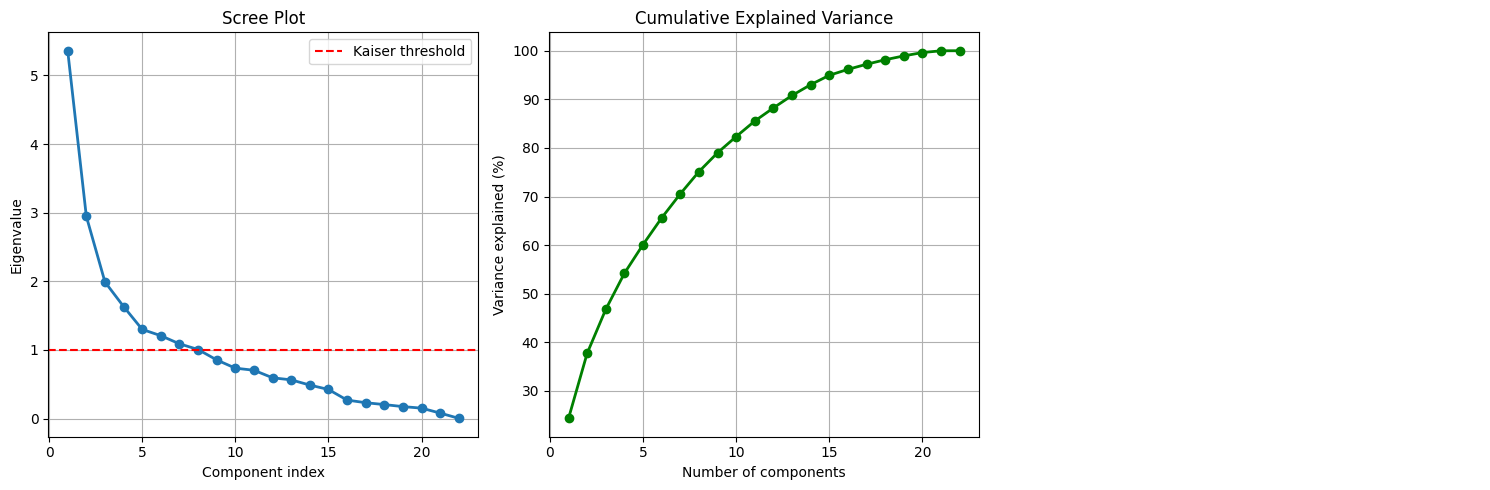

In [ ]:
kaiser_count = np.sum(eig_vals > 1)
print(f"\nNumber of components (Kaiser rule): {kaiser_count}")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(np.arange(1, eig_vals.size + 1), eig_vals, marker='o', linestyle='-', linewidth=2)
axes[0].axhline(1, linestyle='--', color='red', label='Kaiser threshold')
axes[0].set_title("Scree Plot")
axes[0].set_xlabel("Component index")
axes[0].set_ylabel("Eigenvalue")
axes[0].legend()
axes[0].grid(True)

axes[1].plot(np.arange(1, var_ratio_cum.size + 1), var_ratio_cum, marker='o', linestyle='-', linewidth=2, color='green')
axes[1].set_title("Cumulative Explained Variance")
axes[1].set_xlabel("Number of components")
axes[1].set_ylabel("Variance explained (%)")
axes[1].grid(True)

axes[2].axis("off")

plt.tight_layout()
plt.show()


# 4.Факторный анализ с вращением

In [16]:
num_factors = kaiser_count

factor_model = FactorAnalyzer(
    n_factors=num_factors,
    method="principal",
    rotation="varimax"
)
factor_model.fit(X_norm)
rotated_loadings = factor_model.loadings_

loadings_table = pd.DataFrame(
    rotated_loadings,
    index=data_clean.columns,
    columns=[f"Factor_{i+1}" for i in range(num_factors)]
)

filtered_loadings = loadings_table.where(loadings_table.abs() >= 0.40)
display(filtered_loadings.round(5), "rotated factor")
variance_info = factor_model.get_factor_variance()

variance_summary = pd.DataFrame({
    "Factor": [f"Factor_{i+1}" for i in range(num_factors)],
    "Variance_%": variance_info[0] * 100,
    "Cumulative_%": variance_info[2] * 100
})

display(variance_summary.round(5))


c:\Users\1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
empl_num,NaN,NaN,NaN,NaN,NaN,0.58425,-0.40094,NaN
k1,0.89469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k2,0.87804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k3,0.91599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k4,NaN,0.62462,NaN,NaN,NaN,NaN,NaN,NaN
k5,NaN,NaN,NaN,NaN,-0.90761,NaN,NaN,NaN
k6,NaN,NaN,NaN,NaN,NaN,-0.77395,NaN,NaN
k7,NaN,NaN,NaN,NaN,NaN,-0.61430,NaN,NaN
k8,NaN,NaN,NaN,NaN,0.91104,NaN,NaN,NaN
k9,0.54680,NaN,NaN,NaN,0.52672,NaN,NaN,NaN


'rotated factor'

,Factor,Variance_%,Cumulative_%
0,Factor_1,325.06497,14.77568
1,Factor_2,317.07577,29.18822
2,Factor_3,159.17473,36.42343
3,Factor_4,178.50067,44.53710
4,Factor_5,273.32275,56.96086
5,Factor_6,147.04220,63.64459
6,Factor_7,150.07070,70.46599
7,Factor_8,102.15845,75.10956


# Общий вывод
 Проведенный факторный анализ успешно сократил 22 исходные переменные до 8 ключевых факторов, которые объясняют 75.11% общей дисперсии данных. Анализ показал хорошую применимость метода (KMO = 0.748) и статистически значимые корреляции между переменными.

Вращение Varimax позволило выделить интерпретируемые факторы, характеризующие различные аспекты деятельности организаций: производственную эффективность, финансовые показатели, ресурсоемкость, операционную деятельность и другие. Полученная факторная структура может быть использована для дальнейшего анализа данных и построения прогнозных моделей.